In [2]:
# pip install matplotlib
# pip install atoti

SyntaxError: invalid syntax (3164353301.py, line 1)

In [4]:
import psycopg2
import pandas as pd
import psycopg2.extras
# import atoti as tt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        return self.connection

### Q1 ###

#### Div, Dis, Year, Month, Total Sales Cube ####

In [15]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.division, s.district, tim.year, tim.month, sum(t.total_price) "\
        "from star_schema.fact_table t "\
        "join star_schema.store_dim s on s.store_key=t.store_key "\
        "join star_schema.time_dim tim on tim.time_key=t.time_key "\
        "group by CUBE(s.division, s.district, tim.year, tim.month) "
cur.execute(query)
result = cur.fetchall()
result

# pd_loaded = pd.DataFrame(list(result), columns=['division', 'district', 'year', 'month', 'sales'])
# pd_loaded['sales'] = pd_loaded['sales'].astype('float64')
# ax = pd_loaded.plot.pie(x='division', y='sales', figsize=(5, 5))
# con.commit()
# cur.close()

[('BARISAL', 'BARGUNA', 2014, None, Decimal('115381.00')),
 ('BARISAL', 'BARISAL', 2014, None, Decimal('400232.50')),
 ('BARISAL', 'BHOLA', 2014, None, Decimal('137067.75')),
 ('BARISAL', 'JHALOKATI', 2014, None, Decimal('73484.75')),
 ('BARISAL', 'PATUAKHALI', 2014, None, Decimal('155733.50')),
 ('BARISAL', 'PIROJPUR', 2014, None, Decimal('137950.75')),
 ('BARISAL', None, 2014, None, Decimal('1019850.25')),
 ('BARISAL', 'BARGUNA', 2015, None, Decimal('119764.50')),
 ('BARISAL', 'BARISAL', 2015, None, Decimal('415748.75')),
 ('BARISAL', 'BHOLA', 2015, None, Decimal('150377.00')),
 ('BARISAL', 'JHALOKATI', 2015, None, Decimal('78806.00')),
 ('BARISAL', 'PATUAKHALI', 2015, None, Decimal('168432.25')),
 ('BARISAL', 'PIROJPUR', 2015, None, Decimal('143774.25')),
 ('BARISAL', None, 2015, None, Decimal('1076902.75')),
 ('BARISAL', 'BARGUNA', 2016, None, Decimal('120026.00')),
 ('BARISAL', 'BARISAL', 2016, None, Decimal('412411.50')),
 ('BARISAL', 'BHOLA', 2016, None, Decimal('144937.50')),
 

#### Division wise sales ####

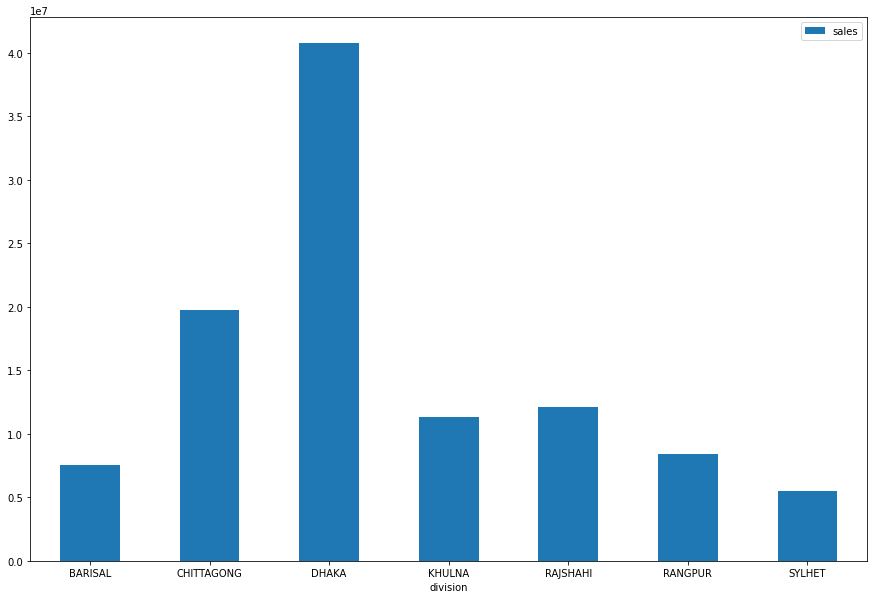

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.division, sum(t.total_price) "\
        "from star_schema.fact_table t "\
        "join star_schema.store_dim s on s.store_key=t.store_key "\
        "group by cube(s.division)"\
        "order by s.division"
cur.execute(query)
result = cur.fetchall()
pd_data = pd.DataFrame(list(result), columns=['division', 'sales'])
pd_data['sales'] = pd_data['sales'].astype('float64')
pd_data = pd_data.dropna()
fig = pd_data.plot.bar(x='division', y='sales', figsize=(15,10), rot=0)

### Q2 ###

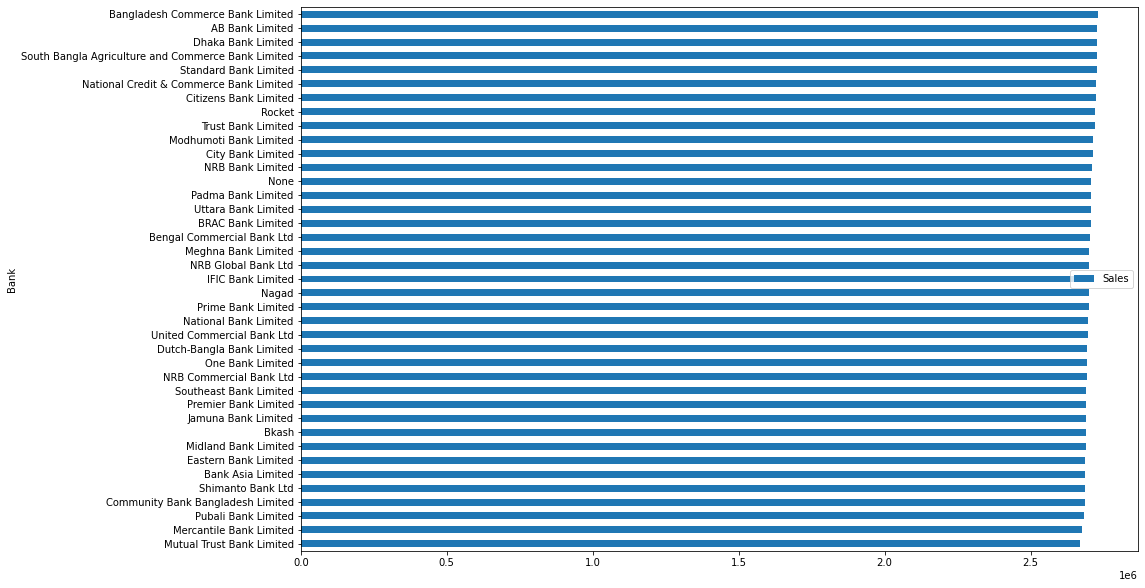

In [36]:
con = PostgresConnection().getConnection()
cur = con.cursor()
# query = "select c.name, t.bank_name, t.trans_type, sum(f.total_price) "\
# "from star_schema.fact_table f "\
# "join star_schema.customer_dim c on c.customer_key=f.customer_key "\
# "join star_schema.trans_dim t on t.payment_key=f.payment_key "\
# "group by CUBE(c.name, t.bank_name, t.trans_type)"
query = "select t.bank_name, sum(f.total_price) "\
"from star_schema.fact_table f "\
"join star_schema.trans_dim t on t.payment_key=f.payment_key "\
"group by cube(t.bank_name) order by sum(f.total_price)"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Bank', 'Sales'])
pd_data['Sales'] = pd_data['Sales'].astype('float64')
pd_data = pd_data.dropna()
fig = pd_data.plot.barh(x='Bank', y='Sales', figsize=(15,10), rot=0)

#### Q3 ####

In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(t.total_price) "\
"from star_schema.fact_table t "\
"join star_schema.store_dim s on s.store_key=t.store_key where s.division='BARISAL'"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('7520343.75'),)]

#### Q4 ####

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(f.total_price) " \
        "from star_schema.fact_table f " \
        "join star_schema.time_dim tim on tim.time_key=f.time_key where tim.year=2015"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('15095720.25'),)]

#### Q5 ####

In [23]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(t.total_price) from star_schema.fact_table t join star_schema.store_dim s on s.store_key=t.store_key join star_schema.time_dim tim on tim.time_key=t.time_key where s.division='BARISAL' and tim.year=2015"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('1076902.75'),)]

#### Q6 ####

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.store_key, i.item_name, sum(f.quantity) from star_schema.fact_table f join star_schema.store_dim s on s.store_key=f.store_key join star_schema.item_dim i on i.item_key=f.item_key group by cube(s.store_key, i.item_name) order by s.store_key, sum(f.quantity) desc"
cur.execute(query)
result = cur.fetchall()
result

[('S0001', None, 8169),
 ('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 70),
 ('S0001', 'Njoy Sugar Canister 22 oz', 69),
 ('S0001', 'Vita Coconut Water 10oz ', 68),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 67),
 ('S0001', 'Sprite - 12 oz cans', 64),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 63),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 62),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 61),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'Dark Chocolate Mint Patties', 60),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 60),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 59),
 ('S0001', 'Large Trash Bags Black 33 gal', 59),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 58),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 57),
 ('S0001', 'Frito Bold Flavors Variety', 56),
 ('S000

#### Q7 ####

#### Q8 ####

#### Q9 ####

In [25]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select c.customer_key, s.store_key, round(avg(f.total_price)::numeric,2) from star_schema.fact_table f join star_schema.store_dim s on s.store_key=f.store_key join star_schema.customer_dim c on c.customer_key=f.customer_key group by cube(c.customer_key, s.store_key) order by c.customer_key, s.store_key, avg(f.total_price) desc"
cur.execute(query)
result = cur.fetchall()
result

[('C000001', 'S0006', Decimal('32.00')),
 ('C000001', 'S00103', Decimal('27.00')),
 ('C000001', 'S00107', Decimal('19.50')),
 ('C000001', 'S00109', Decimal('87.38')),
 ('C000001', 'S00115', Decimal('85.00')),
 ('C000001', 'S00117', Decimal('154.00')),
 ('C000001', 'S00125', Decimal('144.00')),
 ('C000001', 'S00127', Decimal('48.00')),
 ('C000001', 'S0013', Decimal('24.00')),
 ('C000001', 'S00139', Decimal('286.00')),
 ('C000001', 'S00142', Decimal('128.00')),
 ('C000001', 'S00143', Decimal('68.00')),
 ('C000001', 'S00175', Decimal('161.00')),
 ('C000001', 'S00176', Decimal('111.00')),
 ('C000001', 'S00180', Decimal('70.00')),
 ('C000001', 'S00182', Decimal('19.00')),
 ('C000001', 'S00192', Decimal('75.00')),
 ('C000001', 'S00201', Decimal('68.00')),
 ('C000001', 'S00206', Decimal('67.50')),
 ('C000001', 'S00214', Decimal('48.00')),
 ('C000001', 'S0023', Decimal('60.75')),
 ('C000001', 'S00240', Decimal('102.00')),
 ('C000001', 'S00246', Decimal('68.00')),
 ('C000001', 'S00257', Decimal

#### Q10 ####

In [ ]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select c.customer_key, s.store_key, round(avg(f.quantity)::numeric,2) from star_schema.fact_table f join star_schema.store_dim s on s.store_key=f.store_key join star_schema.customer_dim c on c.customer_key=f.customer_key group by cube(c.customer_key, s.store_key) order by c.customer_key, s.store_key, avg(f.quantity) desc"
cur.execute(query)
result = cur.fetchall()
result